In [1]:
!wget https://raw.githubusercontent.com/mln00b/eva6-assignments/main/sess10/sample_coco.csv

--2021-07-17 13:42:35--  https://raw.githubusercontent.com/mln00b/eva6-assignments/main/sess10/sample_coco.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834699 (815K) [text/plain]
Saving to: ‘sample_coco.csv’

sample_coco.csv     100%[===================>] 815.14K  --.-KB/s    in 0.05s   

2021-07-17 13:42:35 (16.2 MB/s) - ‘sample_coco.csv’ saved [834699/834699]



In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("sample_coco.csv")
df.head()

,class_id,img_height,img_width,bbox_y,bbox_x,bbox_h,bbox_w,norm_img_height,norm_img_width,norm_bbox_y,norm_bbox_x,norm_bbox_w,norm_bbox_h
0,0,330,1093,69,464,312,175,1,1,0.209091,0.424520,0.160110,0.945455
1,1,782,439,359,292,83,199,1,1,0.459079,0.665148,0.453303,0.106138
2,3,645,831,297,312,267,167,1,1,0.460465,0.375451,0.200963,0.413953
3,34,943,608,275,112,319,290,1,1,0.291622,0.184211,0.476974,0.338282
4,20,593,857,71,368,146,147,1,1,0.119730,0.429405,0.171529,0.246206


In [4]:
unique, counts = np.unique(df["class_id"], return_counts=True)

In [5]:
print("Num Classes: ", len(unique))

Num Classes:  80


Text(0, 0.5, 'Frequency')

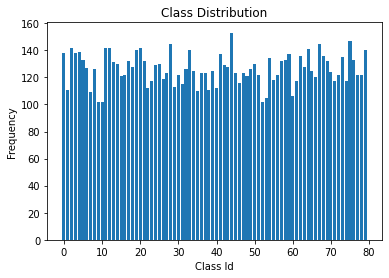

In [6]:
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Class Id')
plt.ylabel('Frequency')

In [7]:
wh = df[["norm_bbox_w", "norm_bbox_h"]]
num_clusters = [3, 4, 5, 6]
anchors_ls = []
for i, num_cluster in enumerate(num_clusters):
    kmeans = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred = kmeans.fit_predict(wh)
    anchors = kmeans.cluster_centers_
    print("Anchors: ", anchors)
    anchors_ls.append(anchors)

Anchors:  [[0.28974134 0.28711913]
 [0.69289688 0.20134954]
 [0.20031795 0.69201832]]
Anchors:  [[0.49395323 0.23465354]
 [0.20139058 0.74280724]
 [0.22350963 0.3259426 ]
 [0.99057558 0.15940826]]
Anchors:  [[0.22548399 0.22692335]
 [0.15402617 0.99619036]
 [0.51352989 0.23484426]
 [1.00474685 0.15753439]
 [0.24406117 0.51136221]]
Anchors:  [[0.5546443  0.17502765]
 [0.18121752 0.55018471]
 [0.22449003 0.22389558]
 [1.0917331  0.15414845]
 [0.15521382 1.06159694]
 [0.41654505 0.40994462]]


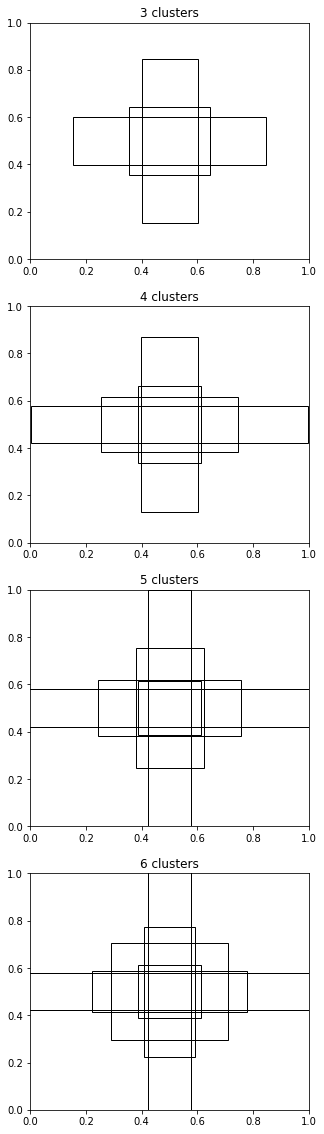

In [8]:
fig, axes = plt.subplots(len(num_clusters), 1, figsize = (5, 20))

for i, num_cluster in enumerate(num_clusters):
  ax = axes[i]
  ax.set_title(f"{num_cluster} clusters")
  anchors = anchors_ls[i]
  for anchor in anchors:
    ax.add_patch(matplotlib.patches.Rectangle(
        (-anchor[0]/2 + 0.5, -anchor[1]/2 + 0.5),anchor[0], anchor[1],
        fill=False))

plt.show()